# Importing Pacakages

In [1]:
#!pip install regex
#!pip install nltk
import numpy as np
import pandas as pd
import nltk
import re,string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading data

In [2]:
df = pd.read_csv('train.csv')
df = df.sample(frac = 1)
df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
357225,1,Spare us.,Mixed metaphors make a mess of this. I am in t...
3027084,2,Maggie could live next door....,Not only do these individuals live in my homet...
3524403,2,Best Symphonic power metal I could find,Rhpasody is to my eyes the best power metal ba...
3187637,2,RJ ~ Real Life,It's one of the best cd's i have ever listened...
1996313,1,Well,It's somewhat worth it if only for the interes...
...,...,...,...
3316524,2,"One of Miyazaki's stranger movies, but fun and...",Porco Rosso: a man with the head of a pig who'...
1877371,2,Good Bargain,Well I like Redbull to begin with so the price...
2744691,1,Thanks for the Great Advice!,I had all intentions of purchasing one of thes...
1152098,2,A classic acoustic set,Uriah Heep is one of the longest lasting rock ...


In [3]:
df.head(5)

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
357225,1,Spare us.,Mixed metaphors make a mess of this. I am in t...
3027084,2,Maggie could live next door....,Not only do these individuals live in my homet...
3524403,2,Best Symphonic power metal I could find,Rhpasody is to my eyes the best power metal ba...
3187637,2,RJ ~ Real Life,It's one of the best cd's i have ever listened...
1996313,1,Well,It's somewhat worth it if only for the interes...


In [4]:
df.dropna(inplace = True)

In [5]:
df.columns = ['Rating', 'Title', 'Review']

# EDA

In [6]:
df = df.sample(100_000)
#df = df.sample(1000)

In [7]:
df['Rating'].value_counts()

Rating
2    50064
1    49936
Name: count, dtype: int64

In [8]:
df["Title_review"] = df['Title'] + " " + df['Review']
df = df.drop(['Title','Review'], axis=1)
df

,Rating,Title_review
3288408,2,Kicks Butt I love this DVD. You can just do th...
3487913,2,Best Ones Out There I have looked for new cani...
3519231,1,"If you are a Crhistie fan, don't bother After ..."
897880,2,Great purchase! This product works! I would re...
2530383,2,"Terrific activity toy Wonderful activity toy, ..."
...,...,...
1328158,2,Perfect for the Beginning Beginner! -This is f...
391465,1,"Ordered new, received used. I ordered this DVD..."
1719223,1,Me-ism This book wasn't worth my time. Kind of...
2933903,2,Prevails over the Mic on the Logitech Webcam! ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3288408 to 244342
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Rating        100000 non-null  int64 
 1   Title_review  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


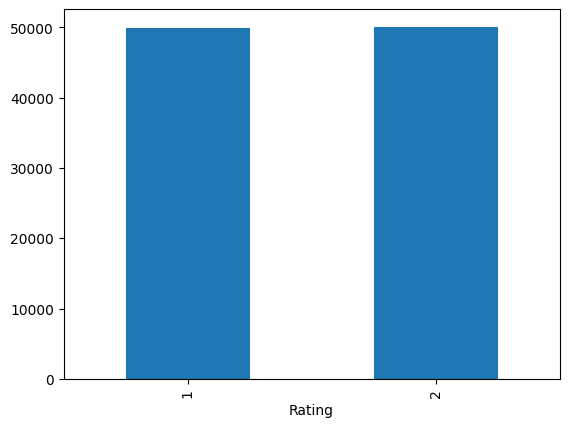

In [10]:
# Analyzing data 
df.groupby('Rating').Rating.count().plot.bar()
plt.show()

# Data Preprocessing

In [11]:
#stop words
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print(df.columns)

Index(['Rating', 'Title_review'], dtype='object')


In [13]:
df['Title_review'].iloc[0]

"Kicks Butt I love this DVD. You can just do the warmup (which does get the blood moving), 1st workout, and cooldown (good for beginners)or do the whole routine for a more intense workout. Either way you definately will feel your lower half the next day! Kathy gives good instruction and the moves are easy to follow. It also feels like an aerobic workout as well with the flow from one set of movements to the next. For those of you who don't like to exercise (like me) you will love how fast it goes. Just when I think I can't do anymore. . .it's over!"

In [14]:
# Data Cleaning using stemmer
stemmer = PorterStemmer()
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['processed_text_column'] = df['Title_review'].apply(preprocess_text)

In [15]:
df = df.drop(['Title_review'], axis=1)

In [16]:
df

,Rating,processed_text_column
3288408,2,kick butt love dvd warmup get blood move 1st w...
3487913,2,best one look new canist two year allclad set ...
3519231,1,crhisti fan dont bother thrill new titl hope l...
897880,2,great purchas product work would recommend mom...
2530383,2,terrif activ toy wonder activ toy son spend ti...
...,...,...
1328158,2,perfect begin beginn beginn yet begin lol buy ...
391465,1,order new receiv use order dvd pay littl want ...
1719223,1,meism book wasnt worth time kind remind tbn te...
2933903,2,prevail mic logitech webcam purchas logitech u...


In [17]:
df.head(5)
df.to_csv('cleaned_test.csv')

In [18]:
# Training model

In [19]:
# Training model

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['processed_text_column']
Y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

#Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])
model = pipeline.fit(X, Y)

In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_rating = model.predict(X_test)
print(accuracy_score(y_test,predict_rating))

0.8777333333333334


In [26]:
review = input("Enter review = ")
review_data = {'predict_rating':[review]}
review_data_df = pd.DataFrame(review_data)
predict_data_cat = model.predict(review_data_df['predict_rating'])
print("Predicted rating  = ",predict_data_cat)

Enter review = worst
Predicted rating  =  [1]


In [23]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

           1       0.88      0.87      0.88      7487
           2       0.87      0.89      0.88      7513

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

[[6509  856]
 [ 978 6657]]


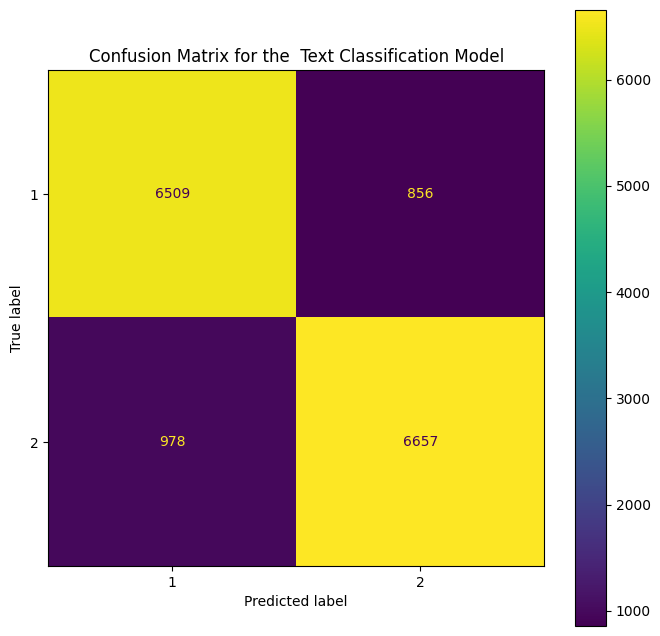

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['1','2']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for the  Text Classification Model')
display.plot(ax=ax);